# 🧮 Exercise: PCA and Linear Algebra (Deep Learning Book - Chapter 2)

## Background
Chapter 2 of *Deep Learning* (Goodfellow, Bengio, Courville) emphasizes the role of **linear algebra** in machine learning.  
One important application is **Principal Component Analysis (PCA)**, which relies on **eigenvalues/eigenvectors** or **singular value decomposition (SVD)** to reduce dimensionality while preserving as much variance as possible.




## Exercise

You are given a dataset of 2D points (could represent activations from a neural network layer):

$$
X = \begin{bmatrix}
2.5 & 2.4 \\
0.5 & 0.7 \\
2.2 & 2.9 \\
1.9 & 2.2 \\
3.1 & 3.0 \\
2.3 & 2.7 \\
2.0 & 1.6 \\
1.0 & 1.1 \\
1.5 & 1.6 \\
1.1 & 0.9
\end{bmatrix}
$$

### Tasks
1. **Center the data**  
   Subtract the mean of each column from the dataset $X$.

2. **Compute the covariance matrix** of the centered data.

3. **Find the eigenvalues and eigenvectors** of the covariance matrix.  
   - Which eigenvector corresponds to the largest eigenvalue?  
   - Interpret this as the **direction of maximum variance**.

4. **Project the data** onto the first principal component (1D subspace).  
   Write the new transformed dataset.

5. (Optional, Deep Learning connection)  
   - Explain why PCA can be seen as a **linear transformation** that learns a new basis.  
   - Discuss how this relates to **hidden layers in neural networks**, which also learn useful representations.

---


## Hint (using NumPy)


In [2]:
import numpy as np

# Step 1: Center the data
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])
X_centered = X - np.mean(X, axis=0)

# Step 2: Covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Eigen decomposition
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# Step 4: Project onto the first principal component
pc1 = eigvecs[:, np.argmax(eigvals)]
X_pca = X_centered @ pc1

print("X_pca:",X_pca)

X_pca: [-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]


In [8]:
# calculate the center
X_centered=X-np.mean(X,axis=0)

# Calculate the covariance matrix

X_cov=np.cov(X_centered,rowvar=False)

# calculate the eigen values and eigen vectors

eigvals,eigvecs=np.linalg.eig(X_cov)

# Project the data on to the first principal component

pc1=eigvecs[:,np.argmax(eigvals)]

X_pca=X_centered@pc1

print("X_pca:",X_pca)




X_pca: [-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]


## Real-World PCA Exercise

Now let's apply PCA to real-world datasets to understand how dimensionality reduction preserves important features while removing noise.

### Hints for Real-World PCA Exercise

**Dataset Options:**
1. **Wine Dataset**: `from sklearn.datasets import load_wine` (13 features, 3 classes)
2. **Breast Cancer**: `from sklearn.datasets import load_breast_cancer` (30 features, 2 classes)
3. **Digits**: `from sklearn.datasets import load_digits` (64 features, 10 classes)

**Steps to implement:**
1. Load dataset and examine features
2. Standardize the data using `StandardScaler()`
3. Apply manual PCA using eigendecomposition
4. Use `np.argsort(eigenvals)[-k:][::-1]` to select top k components
5. Visualize results and calculate variance explained
6. Verify that main features/classes are preserved after dimensionality reduction

In [20]:
# TODO: Implement PCA on a real-world dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Step 1: Load a dataset (choose one from the hints above)
X=load_wine().data

# Step 2: Standardize the features 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Step 3: Center the data
X_centered=X_scaled-np.mean(X_scaled,axis=0)

# Step 4: Compute covariance matrix
X_cov=np.cov(X_centered,rowvar=False)

# Step 5: Eigendecomposition
eigvals,eigvecs=np.linalg.eig(X_cov)


# Step 6: Select top k components using np.argsort()

pc=eigvecs[:,np.argsort(eigvals)[-3:][::-1]]

# Step 7: Project data onto principal components
X_pca=X_centered@pc

# Step 8: Calculate variance explained
print("Explained variance:",eigvals[-2:][::-1]/np.sum(eigvals[-2:][::-1]))


Explained variance: [0.52634184 0.47365816]


In [21]:
eigvals[::-1]

array([0.25232001, 0.22706428, 0.29051203, 0.16972374, 0.35046627,
       0.10396199, 0.55414147, 0.64528221, 0.85804868, 0.92416587,
       1.45424187, 2.51108093, 4.73243698])

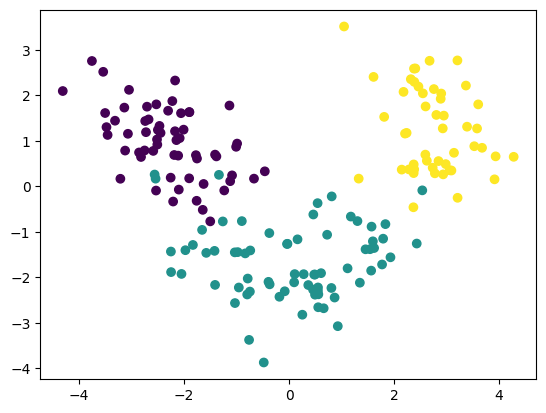

In [23]:
# Step 9: Visualize results (scatter plot, eigenvalues, etc.)

from matplotlib import pyplot as plt

plt.scatter(X_pca[:,0],X_pca[:,1],c=load_wine().target)
plt.show()



